<h1 style="color:#987753"><center>============= IMPORT DEPANDENCIES =============</center></h1>

In [17]:
import tensorflow as tf
import numpy as np
from random import shuffle
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from matplotlib import pyplot as plt
import time
from tensorflow.keras.utils import plot_model
import random
from datetime import datetime
from datetime import date
from random import randint
from tensorflow.keras.callbacks import TensorBoard
import pandas as pd
import csv
import os
from plotly import tools
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<h1 style="color:#987753"><center>============= UTILS FUNCTION =============</center></h1>

In [18]:
def getTime():
    
    now = datetime.now()
    current_time = now.strftime("%H-%M-%S")
    today = str(date.today()).split('-')
    today = today[2]+"_"+today[1]+"_"+today[0]
    runTime = ("%s_%s" %(today,current_time))
    return runTime

In [19]:
def logName():
    
    NAME = "ModelCifar10_Linear_"+str(ID)+"_"+getTime()
    return NAME

In [74]:
def hyperParams():
        
    modelParams = {"Layers":[
                    {"neurons":1 , "activation":"tanh", "dropOut":False},
                    {"neurons":10, "activation":"softmax", "dropOut":False}
                    ],
                   "loss":"categorical_crossentropy",
                   "optimizer":"SGD(lr=0.0001)",
                   "metrics":"accuracy",
                   "learningRate":.0001,
                   "epochs":35,
                   "batchSize":500,
                   "testName":"Simple Linear Model"
                 }
    return modelParams

In [75]:
def humainesLabels(position):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    return labels[position]

In [76]:
def humanizeTime(secs):
    mins, secs = divmod(secs, 60)
    hours, mins = divmod(mins, 60)
    return ('RUN TIME : %02d:%02d:%02d' % (hours, mins, secs))

In [77]:
def loadData():
    
    (trainImages, trainLabels), (testImages, testLabels) = cifar10.load_data()
    trainImages, testImages = trainImages / 255.0, testImages / 255.0
    yTrain = testLabels
    return trainImages, testImages, trainLabels, testLabels


In [78]:
def plotFigure(images=False, labels=False, nbSamples=0, size=10):
    
    plt.figure(figsize=(size, size))
    for i in range(nbSamples):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
       
        plt.xlabel(humainesLabels(labels[i][0]))
    plt.show()
    

<h1 style="color:#987753"><center>============= INIT MODEL =============</center></h1>

In [79]:
def oneHoteEncoding(trainLabels, testLabels):
    
    trainLabels = tf.keras.utils.to_categorical(trainLabels)
    testLabels = tf.keras.utils.to_categorical(testLabels)
    
    return trainLabels, testLabels


In [80]:
def createModel(params):
    
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    for layers in params['Layers']:
        if layers['dropOut'] == False:
            model.add(Dense(layers['neurons'], activation=layers['activation']))
        else:
            model.add(Dense(layers['neurons'], activation=layers['activation']))
            model.add(Dropout(layers['dropOut']))
    
    opt = tf.keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss=params['loss'],
                   optimizer=opt,
                   metrics=['accuracy'])
    
    model.summary()
    return model


<h1 style="color:#987753"><center>============= TRAIN MODEL =============</center></h1>

In [81]:
def reshapeInput(trainImages, testImages):
    
    trainImages.reshape(trainImages.shape[0], trainImages.shape[1] * trainImages.shape[2] * trainImages.shape[3]) #
    testImages.reshape(testImages.shape[0], testImages.shape[1] * testImages.shape[2] * testImages.shape[3]) #
    
    return trainImages, testImages


In [82]:
def fitModel(model, params, trainImages, trainLabels, testImges, testLabels):
    
    start_time = time.time()
    tensorboard = TensorBoard(log_dir='D:\logsProject\{}'.format(logName()))
    ################################ CALCULATE RUNTIME - START ###############################
    history = model.fit(trainImages, trainLabels,
                       epochs=params['epochs'],
                       batch_size=params['batchSize'], verbose=1, callbacks=[tensorboard], validation_data=(testImges, testLabels))
    ################################ CALCULATE RUNTIME - END ###############################
    print(humanizeTime(time.time() - start_time))
    return model, humanizeTime(time.time() - start_time), history

<h1 style="color:#987753"><center>============= EVALUATE MODEL =============</center></h1>

In [83]:
def evaluateModel(model, testImages, testLabels):
    
    return model.evaluate(testImages, testLabels, batch_size=50)


<h1 style="color:#987753"><center>============= PREDICT =============</center></h1>

In [84]:
def predictionPercent(model, testImages, testLabels):
    
    prediction = model.predict(testImages)
    predicted = []
    for i in range(len(prediction)):
        if np.argmax(testLabels[i]) == np.argmax(prediction[i]):
            predicted.append(1)
        else:
            predicted.append(0)
    print("Predicted percent {} %".format((sum(predicted)/(len(predicted)) * 100)))
    result = (sum(predicted)/len(predicted)) * 100
    
    return prediction, result

In [85]:
def plotPredictedResult(prediction, testImages, testLabels):
    
    plt.figure(figsize=(15, 15))
    for i in range(20):
        plt.subplot(5,7,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(testImages[i])
        plt.xlabel("True: "+humainesLabels(np.argmax(testLabels[i]))+"\n\n\n")
        plt.title("\nPredicted: "+humainesLabels(np.argmax(prediction[i])))
        
    plt.show()

<h1 style="color:#987753"><center>============= PLOT ACCURACY AND LOSS =============</center></h1>

In [86]:
def trace(x,y,imagesLabels,color):
        trace = go.Scatter(
            x = x,y = y,
            name=imagesLabels,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace

def plotAccLoss(model):
    
    hist = model.history
    acc = hist['accuracy']
    valAcc = hist['val_accuracy']
    loss = hist['loss']
    valLoss = hist['val_loss']

    epochs = list(range(1,len(acc)+1))

    traceA = trace(epochs,acc,"Training accuracy", "Green")
    traceVa = trace(epochs,valAcc,"Validation accuracy", "Red")
    traceL = trace(epochs,loss,"Training loss", "Blue")
    traceVl = trace(epochs,valLoss,"Validation loss", "Magenta")

    fig = plotly.subplots.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(traceA,1,1)
    fig.append_trace(traceVa,1,1)
    fig.append_trace(traceL,1,2)
    fig.append_trace(traceVl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])


    iplot(fig, filename='accuracy-loss')

<h1 style="color:#987753"><center>============= SAVE MODEL =============</center></h1>

In [87]:
def saveModel(model, ID):
    
    now = datetime.now()
    current_time = now.strftime("%H-%M-%S")
    today = str(date.today()).split('-')
    today = today[2]+"_"+today[1]+"_"+today[0]
    runTime = ("%s_%s" %(today,current_time))
    model.save('D:\Models\model_run_'+runTime+"_"+str(ID))


In [88]:
def readLogFile(path="D:/LogsProject/hyperParams/finalRecap.csv", cols=None):
    
    try:
        
        df = pd.read_csv(path, sep=";" ,encoding='utf-8')
        return df, path
    
    except Exception as e:
        
        print('-Erorr file not found, it will be created now... \n-Error tracback : %s' %(e))
        f = open(path, "w")
        writer = csv.DictWriter(f, fieldnames=cols)
        writer.writeheader()
        f.close()
        df = pd.read_csv(path, sep="," ,encoding='utf-8')
        return df, path

In [89]:
def generateExcelParams(params, history, resultEV, runTime):
    
    pass

    params['indiv_id'] = ID
    params['Layers'] = ';'.join(str(dict_) for dict_ in params['Layers'])
    params['valAccuracy'] = resultEV[1]
    params['valLoss'] = resultEV[0]
    params['trainAccuracy'] = round(history.history['accuracy'][params['epochs']-1].item(), 3)
    params['trainLoss'] = round(history.history['loss'][params['epochs']-1].item(), 3)
    params['runTime'] = runTime.split(' ')[3]
    
    
    dictToCsv = dict()
    for key, value in zip(params.keys(), params.values()):
        
        tmp = []
        tmp.append(value)
        dictToCsv[key] = tmp
    
    
    df = pd.DataFrame(dictToCsv, columns=params.keys())
    mainDirectory = os.getcwd() + "\\logs\\linear\\logs_" + getTime()+"\\"
    os.mkdir(mainDirectory)
    df.to_csv(mainDirectory+"combined_recap.csv", sep=";", index=None, header=True)
#     logFile, path = readLogFile(cols=params.keys())
#     dfMerged = pd.concat([logFile, df], ignore_index=True)
#     os.remove(path)
#     dfMerged.to_csv(path, sep=";", index=None, header=True)

#     return dfMerged

In [90]:
def main():
    
    global ID
    ID = random.randint(1,1000000)
    print("================================ ID RUN %s ================================" % (ID))
    params = hyperParams()
    (trainImages, testImages, trainLabels, testLabels) = loadData()
    
    yTest = testLabels
    print("================================ SHAPE ================================")
    print("\t- NB TRAIN SAMPLES %s WIDTH %s HEIGHT %s COLOR %s" % (trainImages.shape))
    print("\t- NB TEST SAMPLES %s WIDTH %s HEIGHT %s COLOR %s" % (testImages.shape))
    
    print("================================ PLOT FIGURE ================================")
    plotFigure(trainImages, trainLabels, nbSamples=25)
    
    print("================================ ONEHOT ENCODING ================================")
    trainLabels, testLabels = oneHoteEncoding(trainLabels, testLabels)
    
    print("================================ CREATE MODEL ================================")
    model = createModel(params)
    
    plot_model(model, "GraphModel/model_"+str(ID)+"_.png")
    
    print("================================ RESHAPE INPUTS ================================")
    trainImages, testImages = reshapeInput(trainImages, testImages)
    
    print("================================ FIT MODEL ================================")
    model, runTime, history = fitModel(model, params, trainImages, trainLabels, testImages, testLabels)
    
    print("================================ PLOT ACCURACY AND LOSS ================================")
    plotAccLoss(history)
    
    print("================================ EVALUATE MODEL ================================")
    resultEV = evaluateModel(model, testImages, testLabels)
    
    print("================================ PREDICITION ================================")
    prediction, result = predictionPercent(model, testImages, testLabels)
    
    print("================================ PLOT PREDICITION ================================")
    plotPredictedResult(prediction, testImages, testLabels)
    
    print("================================ SAVE MODEL ================================")
    saveModel(model, ID)
    
    print("================================ GENERATE CSV HYPERPARAMS ================================")
    jsonDf = generateExcelParams(params, history, resultEV, runTime)

================================ ID RUN 700569 ================================
================================ SHAPE ================================
	- NB TRAIN SAMPLES 50000 WIDTH 32 HEIGHT 32 COLOR 3
	- NB TEST SAMPLES 10000 WIDTH 32 HEIGHT 32 COLOR 3
================================ PLOT FIGURE ================================


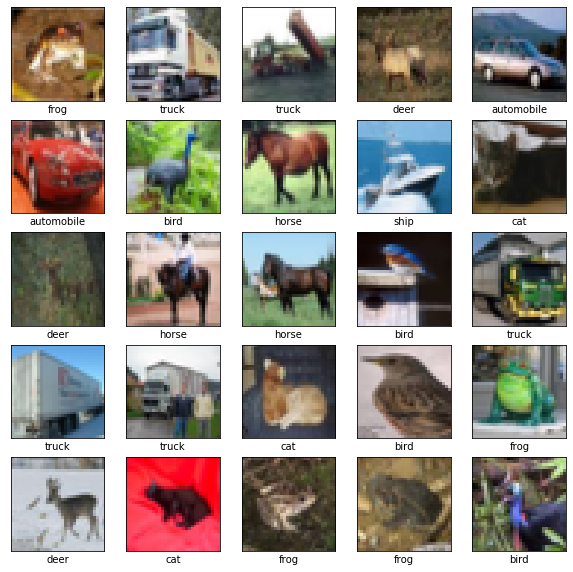

================================ ONEHOT ENCODING ================================
================================ CREATE MODEL ================================
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3073      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                20        
Total params: 3,093
Trainable params: 3,093
Non-trainable params: 0
_________________________________________________________________
================================ RESHAPE INPUTS ================================
================================ FIT MODEL ================================
Train on 50000 samples, validate on 10000 samples
Epoch 1/35
500

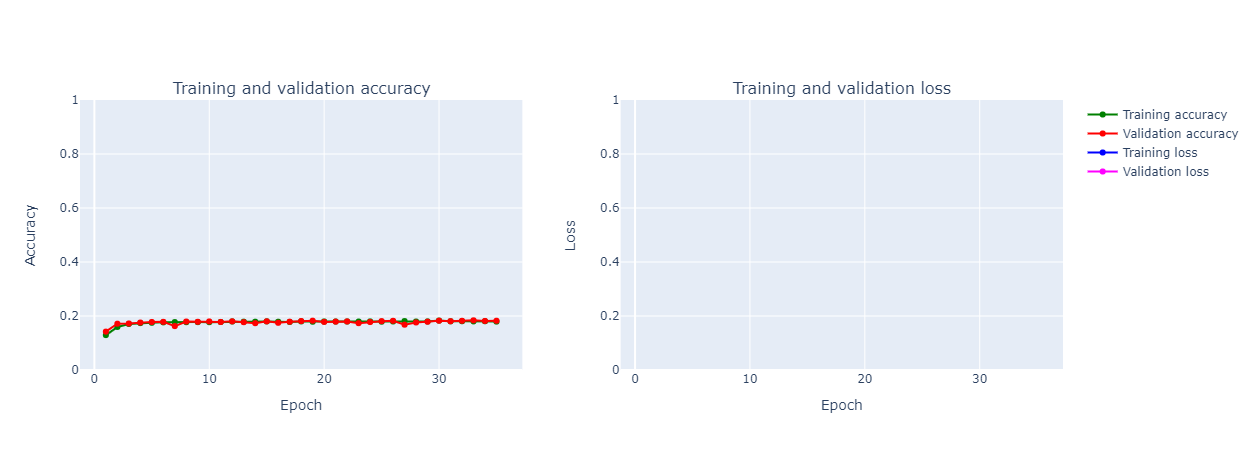

================================ EVALUATE MODEL ================================
10000/10000 [==============================] - 0s 40us/sample - loss: 2.0820 - accuracy: 0.1824
================================ PREDICITION ================================
Predicted percent 18.240000000000002 %
================================ PLOT PREDICITION ================================


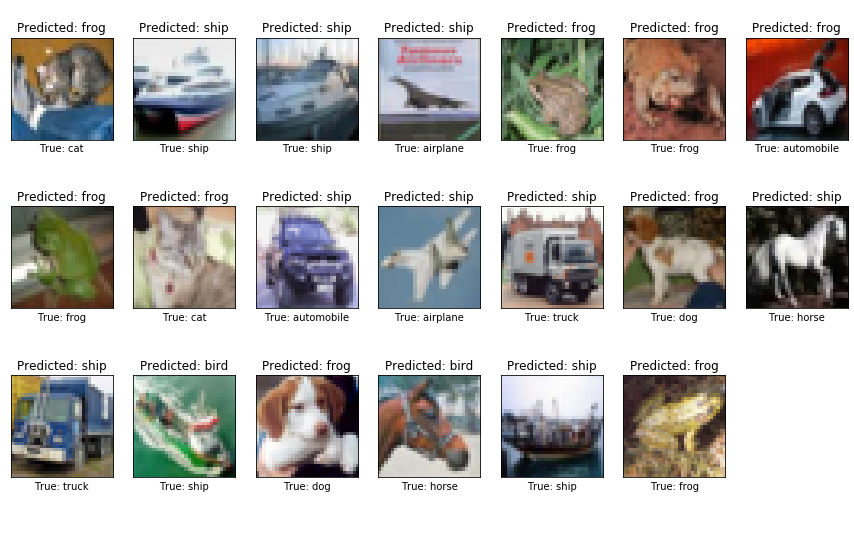

================================ SAVE MODEL ================================
INFO:tensorflow:Assets written to: D:\Models\model_run_10_02_2020_19-30-29_700569\assets
================================ GENERATE CSV HYPERPARAMS ================================


In [91]:
main()